# Importações

In [1]:
from sklearn.cluster import KMeans 

import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from matplotlib import pyplot as plt 

## Carregando dataset

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

### Verificando os dados

In [3]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [4]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Text(0, 0.5, 'age')

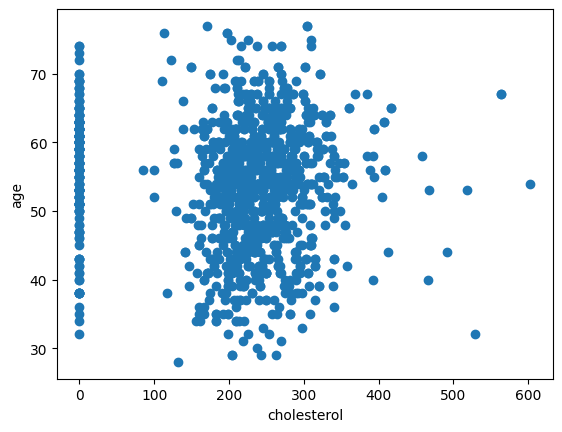

In [17]:
# Gráfico de Dispersão: age x cholesterol

plt.scatter(df['cholesterol'],df['age']) 

plt.xlabel("cholesterol") 

plt.ylabel('age') 

In [18]:
# WCSSE 

sse = [] 

k_rng = range(1,10) 

for k in k_rng: 

    km = KMeans(n_clusters=k) 

    km.fit(df[['cholesterol','age']]) 

    sse.append(km.inertia_) 

print(sse) 

[12334319.262184877, 3375587.236187424, 1525033.3483102769, 955259.3948124294, 620323.1928835117, 449193.5742490136, 350662.6987345046, 287357.7838469154, 245214.99436153722]


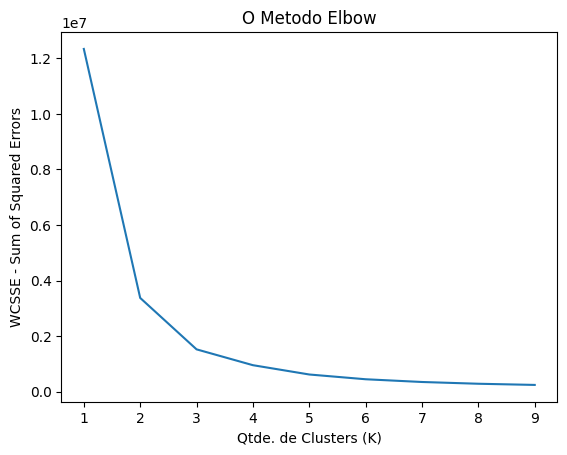

In [19]:
plt.title('O Metodo Elbow') 

plt.xlabel('Qtde. de Clusters (K)') 

plt.ylabel('WCSSE - Sum of Squared Errors') # Within Cluster Sum of Squares 

plt.plot(k_rng,sse) 

In [20]:
# Construção do Modelo de ML 

km = KMeans(n_clusters=3) #  

In [25]:
# Aplicação do Modelo:      Index:  0       1           2                      3 

y_predicted = km.fit_predict(df[['cholesterol', 'sex','age']]) 

y_predicted 

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [26]:
km.cluster_centers_  

array([[301.45430809,   0.67624021,  54.61096606],
       [212.96044304,   0.76898734,  52.49050633],
       [  1.62857143,   0.93714286,  56.21142857]])

In [27]:
df['cluster']=y_predicted 

df.head() 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,cluster
0,40,1,2,140,289,0,0,172,0,0.0,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0,1


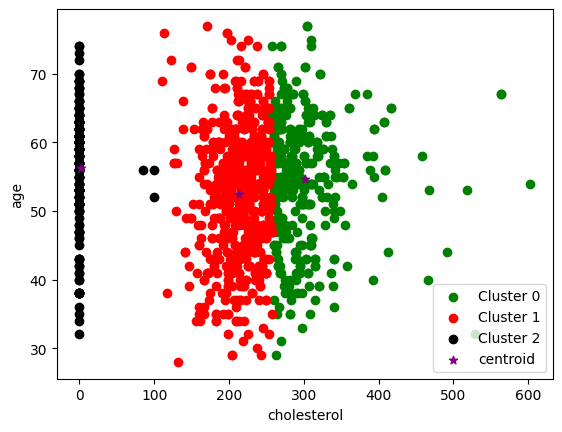

In [28]:
df1 = df[df.cluster==0] 

df2 = df[df.cluster==1] 

df3 = df[df.cluster==2] 


plt.scatter(df1['cholesterol'],df1['age'] ,color='green',label='Cluster 0') 

plt.scatter(df2['cholesterol'],df2['age'] ,color='red',label='Cluster 1') 

plt.scatter(df3['cholesterol'],df3['age'] ,color='black',label='Cluster 2') 


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,2],color='purple',marker='*',label='centroid') 

plt.xlabel("cholesterol") 

plt.ylabel('age') 

plt.legend() 